In [1]:
import numpy as np
import torch
import torch.nn as nn
import torch.optim as optim
import wandb
import numpy as np
import torch
import random
import itertools
import Levenshtein
from tqdm import tqdm
from model import seq2seq, seq2seq_attn, compare_sequences 

x_train = np.loadtxt("akshar_sequences//x_train.csv", delimiter=",", dtype=int)
y_train = np.loadtxt("akshar_sequences//y_train.csv", delimiter=",", dtype=int)
x_test = np.loadtxt("akshar_sequences//x_test.csv", delimiter=",", dtype=int)
y_test = np.loadtxt("akshar_sequences//y_test.csv", delimiter=",", dtype=int)
x_val = np.loadtxt("akshar_sequences//x_val.csv", delimiter=",", dtype=int)
y_val = np.loadtxt("akshar_sequences//y_val.csv", delimiter=",", dtype=int)


class SequenceDataset(torch.utils.data.Dataset):
    def __init__(self, x, y):
        self.x = x
        self.y = y
    
    def __getitem__(self, index):
        x = torch.from_numpy(self.x[index]).long() 
        y = torch.from_numpy(self.y[index]).long() 
        return x, y
    
    def __len__(self):
        return len(self.x)

train_dataset = SequenceDataset(x_train, y_train)
val_dataset = SequenceDataset(x_val, y_val)
test_dataset = SequenceDataset(x_test, y_test)

In [2]:
from model import compare_sequences, train, test
from tqdm import tqdm
import torch
import torch.nn as nn
import torch.optim as optim

In [3]:
VOCAB_SIZE = 131
MAX_SEQ_SIZE = 28

# batch_size
# 64
# bidirectional
# 1
# cell_type_decoder
# "RNN"
# cell_type_encoder
# "LSTM"
# dropout
# 0.3
# hidden_layer_size
# 64
# input_embedding_size
# 512
# num_decoder_layers
# 4
# num_encoder_layers
# 4
# teacher_forcing
# 1

# model = train(VOCAB_SIZE, 512, 64, 4, 4, 
#                  0.3, 1, "LSTM", "RNN", 1, 
#                  64, MAX_SEQ_SIZE, 25, 1, train_dataset, val_dataset)

# torch.save(model.state_dict(), "models//model_attn.pth")

model = seq2seq_attn(VOCAB_SIZE, 512, 64, 4, 4, 
                 0.3, 1, "LSTM", "RNN", 1, 
                 64, MAX_SEQ_SIZE)

model.load_state_dict(torch.load("models//model_attn.pth"))

predictions, targets, y_pred, y_true = test(model, test_dataset, 1)

Testing accuracy for model : 0.374267578125


In [7]:
import csv

def write_to_csv(strings, filename):

    with open(filename, 'w', encoding='utf-8', newline='') as csvfile:
        writer = csv.writer(csvfile)
        writer.writerows([[string] for string in strings])  

write_to_csv(predictions, 'attention_predictions//predictions_1')

In [15]:


def attention_test(targets):

    y_true = targets
    y_pred_attention = [i[:-1] for i in open("attention_predictions\\predictions_1", encoding='utf-8')]
    y_pred_vanilla = [i[:-1] for i in open("vanilla_predictions\\predictions_2", encoding='utf-8')]

    count = 0
    soln = []

    for i in range(len(y_true)):

        if(not Levenshtein.distance(y_true[i],y_pred_attention[i]) and Levenshtein.distance(y_true[i],y_pred_vanilla[i])):

            soln.append((y_pred_attention[i], y_pred_vanilla[i]))
            count+=1

    print("{} such pairs found.".format(count))

    return soln

attention_test(targets)

642 such pairs found.


[('थरमैक्स', 'थर्ैक्स'),
 ('ट्विटर्स', 'ट्वाटर्स'),
 ('तिरुनेलवेली', 'तिरुलेवेेली'),
 ('फूहड़ता', 'फूहाडता'),
 ('सेक्वेंट', 'सीक्येंट'),
 ('उतराधिकारी', 'उतराधीकारी'),
 ('साहित्योत्सव', 'साहित्योत्तव'),
 ('शिकायतकर्ता', 'शिकायक्र्ता'),
 ('अंदरखाने', 'अंदर्ाने'),
 ('मुर्गीपालन', 'मुर्गीपाला'),
 ('रजौरी', 'राौरी'),
 ('शृंगार', 'श्ंगरा'),
 ('बौनी', 'बोनी'),
 ('अनुसारका', 'अनुसाराा'),
 ('बुएना', 'ब्एना'),
 ('कैंटरबरी', 'कांटरबरी'),
 ('फार्म', 'फरर्म'),
 ('महानगरवासियों', 'महााारााजययों'),
 ('उपनेता', 'उपनेटा'),
 ('कार्ययोजना', 'कार्ययाजना'),
 ('कुर्वेती', 'कुरववेटी'),
 ('श्रीमति', 'श्रीमती'),
 ('विवेकाधिकारों', 'विवाकाधिकोरों'),
 ('कबहा', 'काहा'),
 ('घोटालेबाजों', 'घोटालाबाओों'),
 ('धभाशारा', 'ढभकशारा'),
 ('बालकृष्ण', 'बालकृष्णा'),
 ('क्लेन', 'कलेेन'),
 ('कैटलिन', 'कैटलीन'),
 ('कोट्टयम', 'कोट्टाा'),
 ('एड्डी', 'एडीडी'),
 ('लुइस', 'लुएस'),
 ('साइंस', 'साइनस'),
 ('बाधाओं', 'बाढाओं'),
 ('दीपन', 'दीपा'),
 ('अर्यमा', 'आर्याा'),
 ('त्रिभाषा', 'तृरिभाषा'),
 ('सूदखोरों', 'सुद्ोरों'),
 ('सुरवीन', '

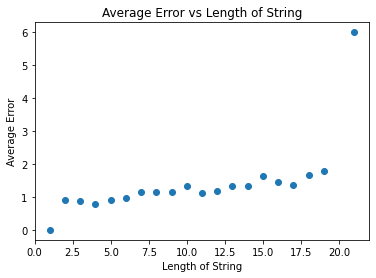

In [5]:
from viz import plot_avg_error_vs_length, plot_confusion_matrix

plot_avg_error_vs_length(targets, predictions)

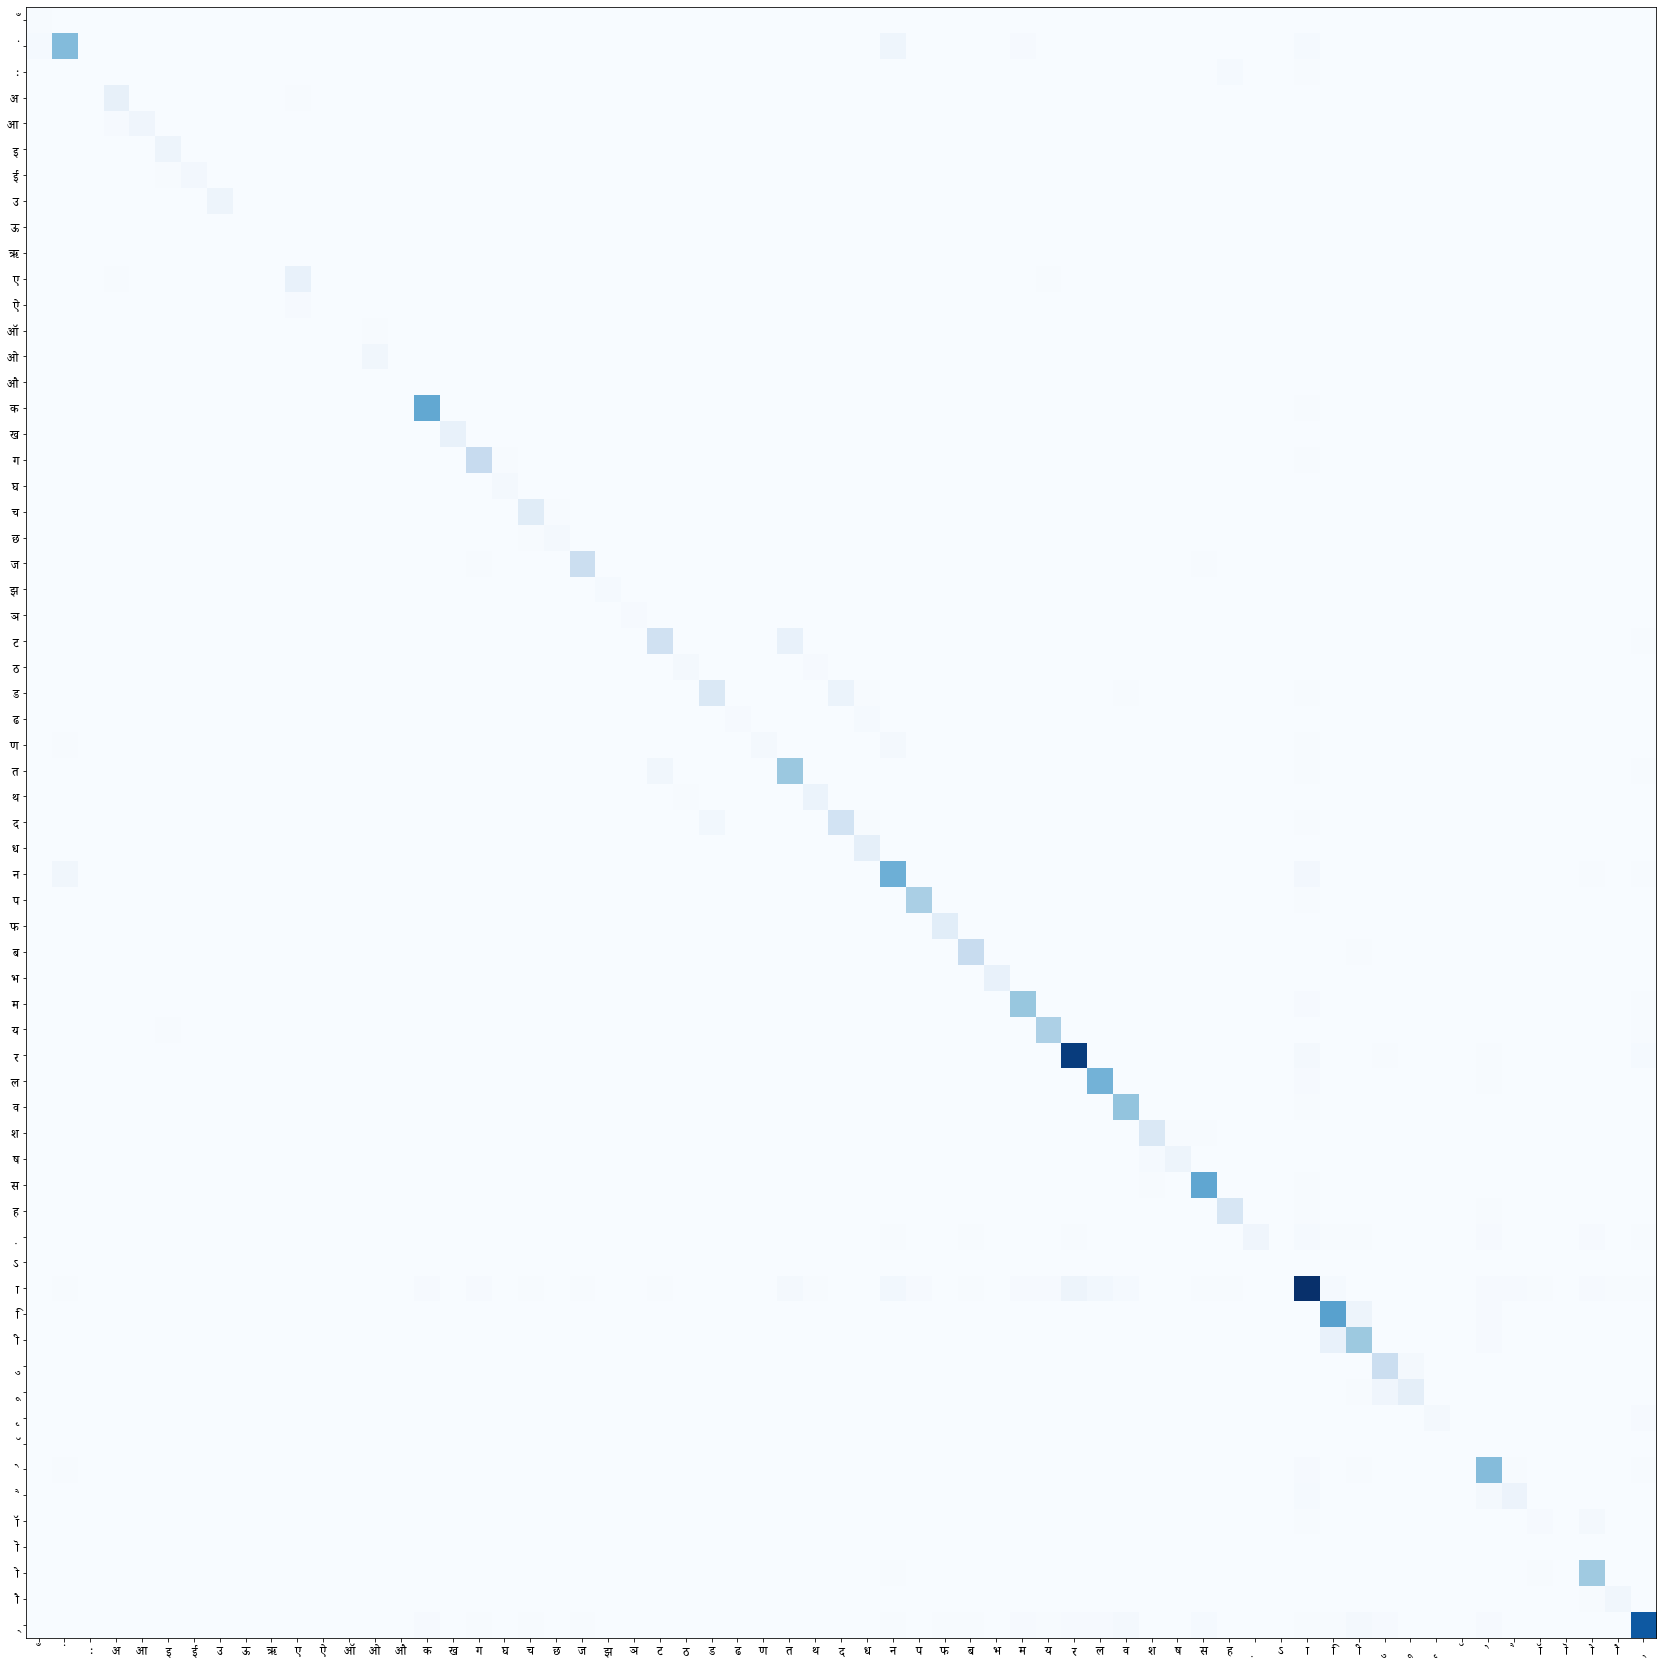

In [6]:
plot_confusion_matrix(y_pred, y_true)

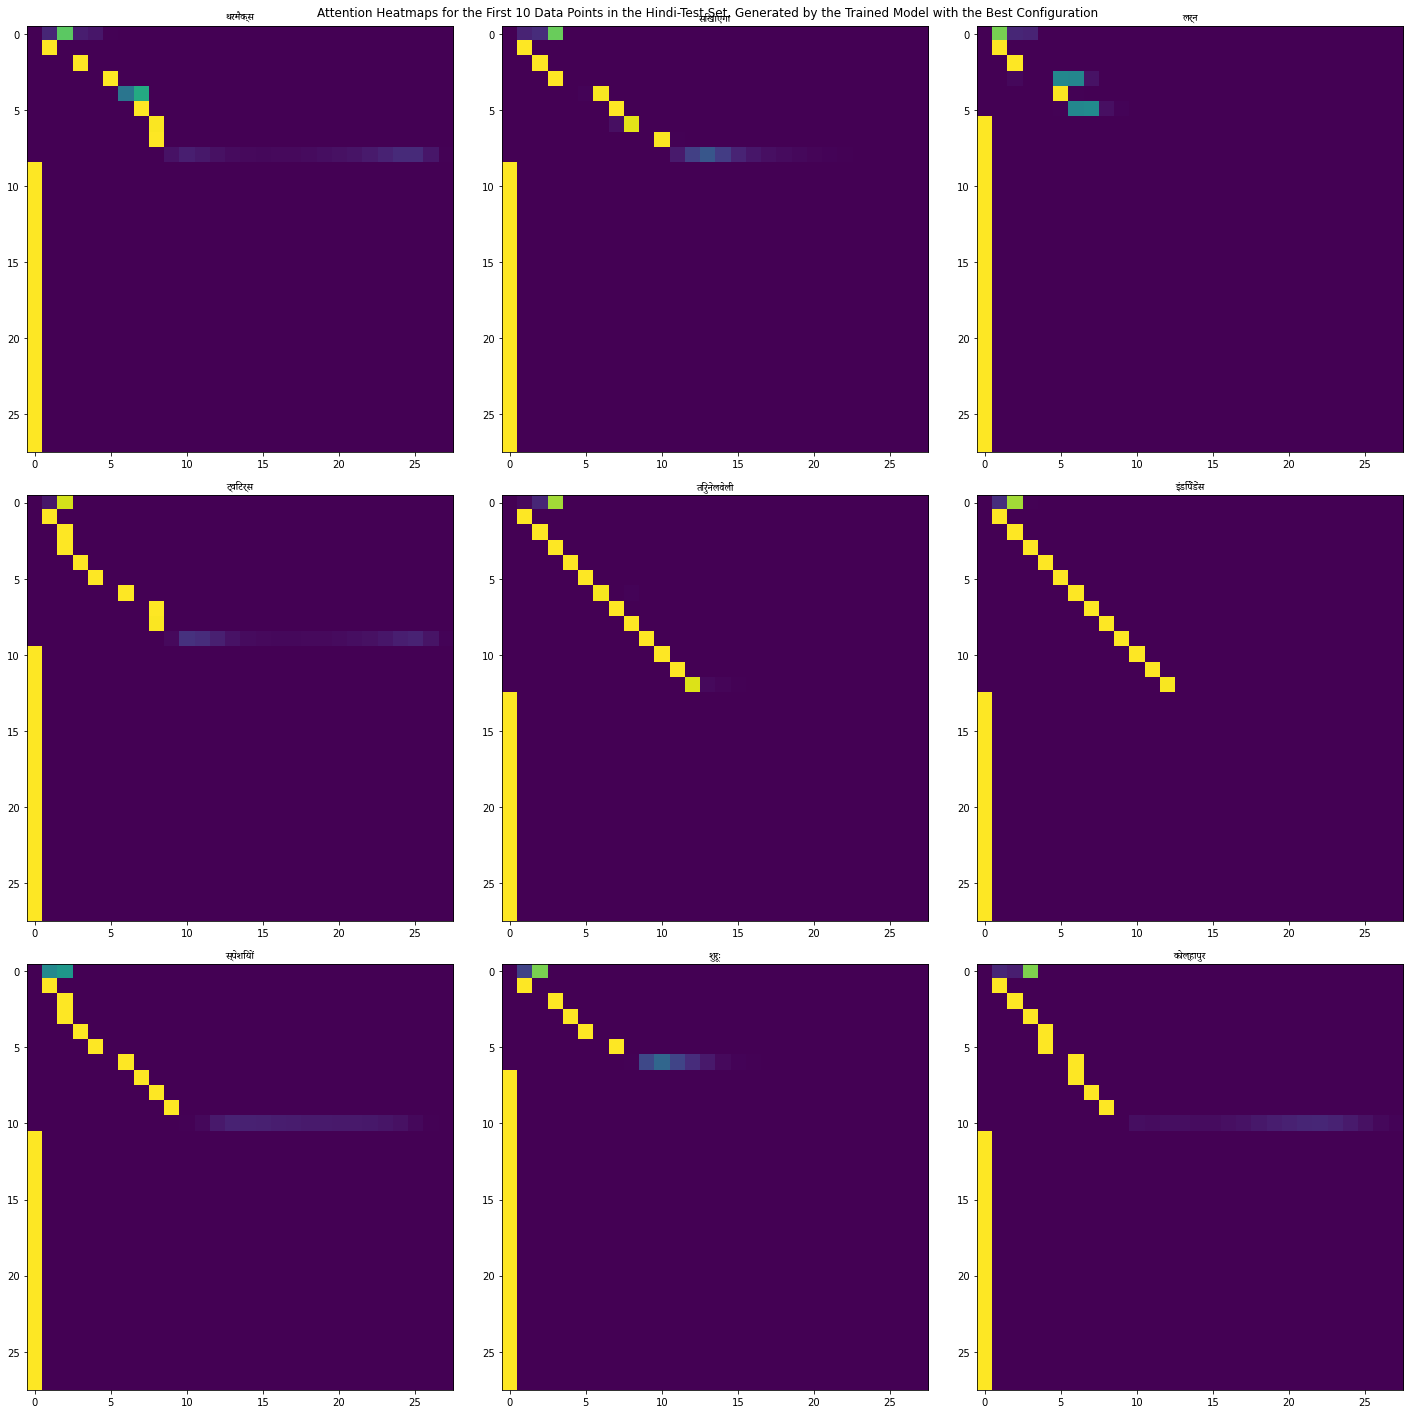

In [7]:
from viz import plot_attention_heatmap

plot_attention_heatmap(model, test_dataset, targets)

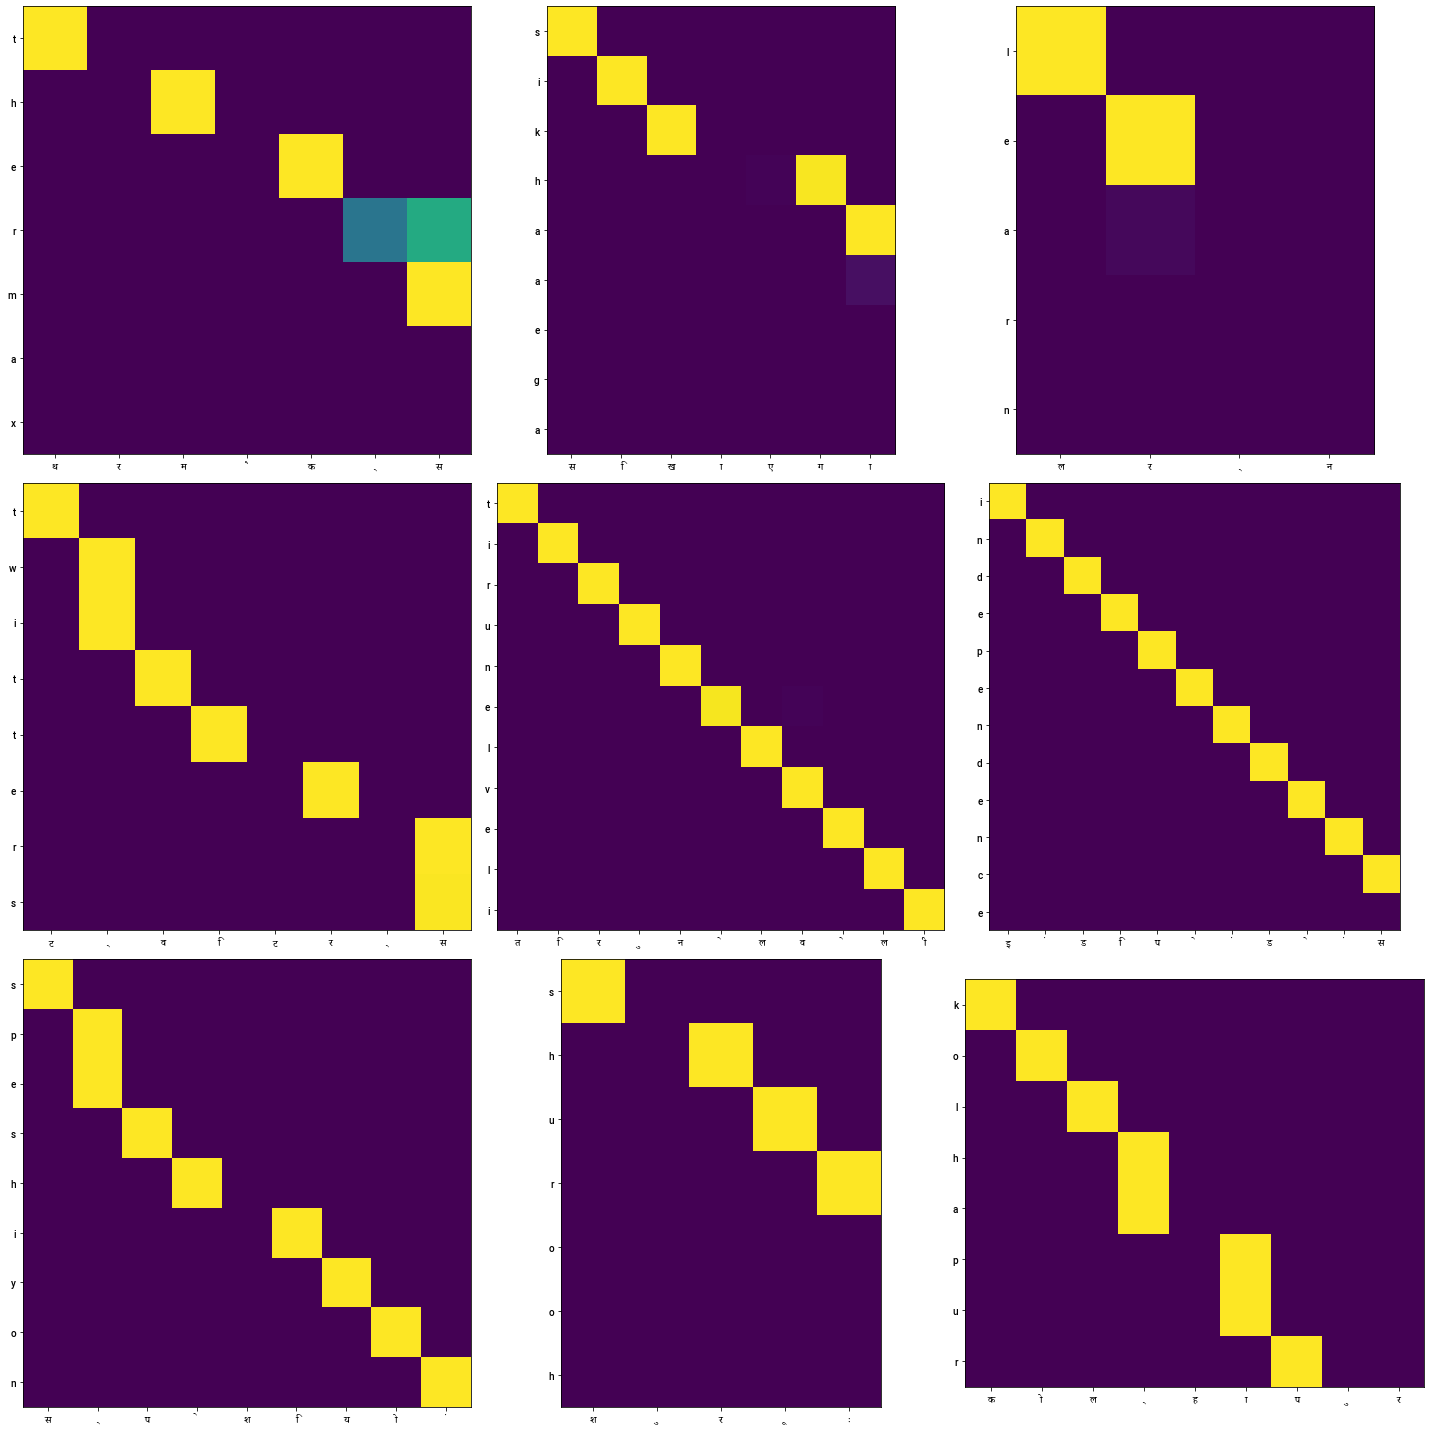

In [8]:
from viz import plot_attention_heatmap_truncated

plot_attention_heatmap_truncated(model, test_dataset)